## Grafo Direcional (Completo)

    Dentro da célula de código abaixo, conta o código que utilizamos para plotar o nosso grafo.

Fizemos um grafo direcional, onde cada um dos vértices são times de futebol de diversas ligas, que tiveram suas transferências registradas entre o periodo de 2024 e 2025, ao todo compilamos dados de 313 clubes. Já as arestas, representam cada um dos sentidos das transferências, note que multiplas transferências podem ser feitas num mesmo sentido (nos aprofundamos nisso em outros arquivos), dito isso, visando não fazer uso de grafos direcionais e tendo consciência de que esses casos não representam nem 5% das arestas em um caso de multi grafo, optamos por usar um modelo de grafo simples direcional não-ponderado, registrando informações que podem vir a ser utéis em nossas análises, como datas, nomes, id's (do nosso banco de dados) e valores dentro de cada uma de suas respectivas arestas.


VÉRTICES DO GRAFO: 313
ARESTAS DO GRAFO: 508


<function matplotlib.pyplot.show(close=None, block=None)>

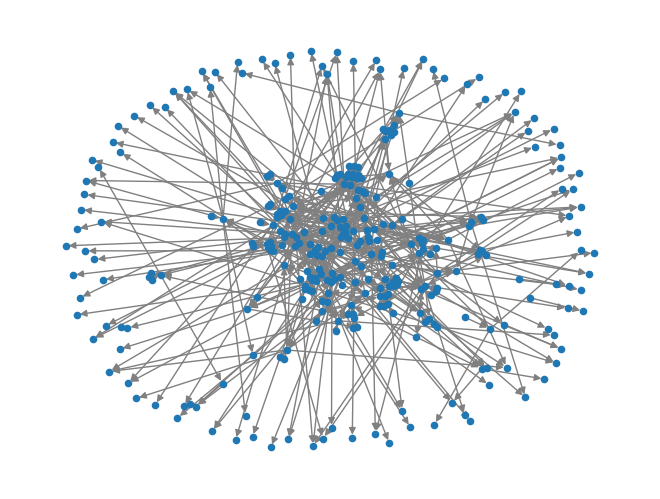

In [1]:
#Carregamento do arquivo .env
from dotenv import load_dotenv
import os
load_dotenv()

# FETCH da API
import requests
response = requests.get(os.getenv('GET_TRANSFERENCIAS'))
data = response.json()

# Criação do grafo e plotagem dos dados
import networkx as nx
import matplotlib.pyplot as plt

grafo = nx.DiGraph()

if response.status_code == 200:
    conexoes_jogadores = {}

    for registro in data['transferências']:
        if registro['jogador'] not in conexoes_jogadores.keys():
            conexoes_jogadores[registro['jogador']] = []

        conexoes_jogadores[registro['jogador']].append(registro)
        grafo.add_edge(registro['de'], registro['para'], weight=1, transferencias=[], quantidade_transferencias=1) 

    for jogador, conexoes in  conexoes_jogadores.items():
        for conexao in conexoes:
            grafo[conexao['de']][conexao['para']]['transferencias'].append({
                    'data': conexao['data'],
                    'jogador': conexao['jogador'],
                    'valor': conexao['valor'],
                    'id': conexao['id']
                    })
            
            grafo[conexao['de']][conexao['para']]['quantidade_transferencias'] = len(grafo[conexao['de']][conexao['para']]['transferencias'])
 
# Impressão dos vértices e arestas do grafo
print(f'VÉRTICES DO GRAFO: {grafo.number_of_nodes()}')
print(f'ARESTAS DO GRAFO: {grafo.number_of_edges()}')

layout = nx.spring_layout(grafo, k=0.5, scale=50) # Definição do layout usado no grafo

# Desenho do grafo
nx.draw(grafo, node_size=20, edge_color='gray', arrowsize=10)
plt.show

### Análise imediata do Grafo:

    O grafo aparentemente consiste em um macro-bloco onde se concentram transferências e times, que em sua periferia e quase que completamente cercado por vértices menos relevantes, destes a sua maioria, receptores das transferências.

## Métricas do Grafo

    Dentro da célula de abaixo, constam algumas das métricas extraídas do grafo.

In [2]:
# DADOS DE CENTRALIDADE DO GRAFO
cent_vertices       = nx.degree_centrality(grafo)
cent_proximidade    = nx.closeness_centrality(grafo)
cent_intermediacao  = nx.betweenness_centrality(grafo)
cent_autovetor      = nx.eigenvector_centrality(grafo)
cent_out_dregree    = nx.out_degree_centrality(grafo)
cent_in_dregree     = nx.in_degree_centrality(grafo)

pagerank = nx.pagerank(grafo) # DADOS DE PAGERANK DO GRAFO

# ORGANIZAÇÃO DOS DADOS
cent_vertices       = dict(sorted(cent_vertices.items(), key=lambda item: item[1], reverse=True ))
cent_proximidade    = dict(sorted(cent_proximidade.items(), key=lambda item: item[1], reverse=True ))
cent_intermediacao  = dict(sorted(cent_intermediacao.items(), key=lambda item: item[1], reverse=True ))
cent_autovetor      = dict(sorted(cent_autovetor.items(), key=lambda item: item[1], reverse=True ))
cent_out_dregree    = dict(sorted(cent_out_dregree.items(), key=lambda item: item[1], reverse=True))
cent_in_dregree     = dict(sorted(cent_in_dregree.items(), key=lambda item: item[1], reverse=True))
pagerank            = dict(sorted(pagerank.items(), key=lambda item: item[1], reverse=True))

## Histogramas do Grafo

    Dentro das células de código abaixo, constam alguns histogramas associados a métricas extraídas do grafo.

### Histograma para Centralidade dos Vértices

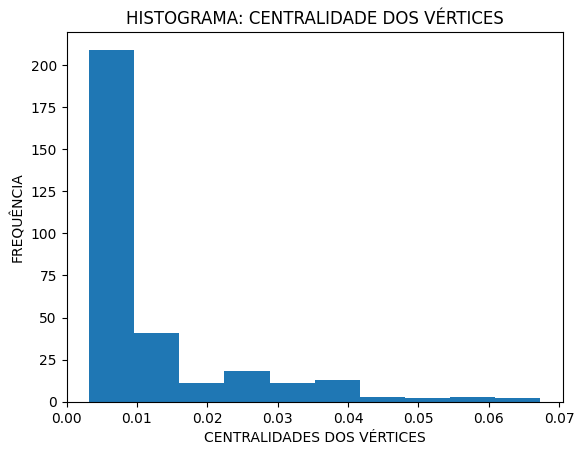

In [ ]:
import matplotlib.pyplot as plt # Import para histogramas e gráficos

dados = []
for chave, valor in cent_vertices.items():
    dados.append(valor)

plt.hist(dados, bins=10)
plt.xlabel("CENTRALIDADES DOS VÉRTICES")
plt.ylabel("FREQUÊNCIA")
plt.title("HISTOGRAMA: CENTRALIDADE DOS VÉRTICES")
plt.show()

### Histograma para Centralidade de Proximidade (Closeness)

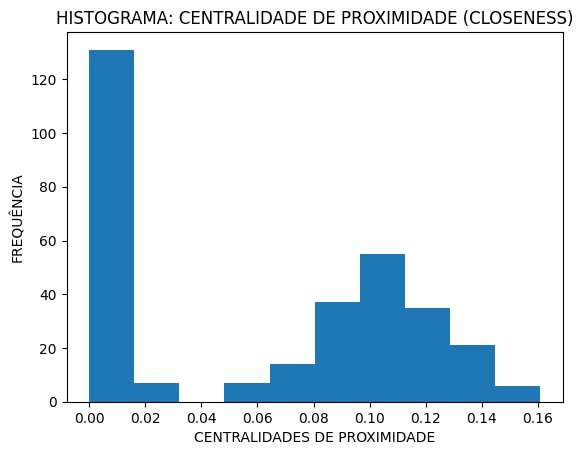

In [ ]:
dados = []
for chave, valor in cent_proximidade.items():
    dados.append(valor)

plt.hist(dados, bins=10)
plt.xlabel("CENTRALIDADES DE PROXIMIDADE")
plt.ylabel("FREQUÊNCIA")
plt.title("HISTOGRAMA: CENTRALIDADE DE PROXIMIDADE (CLOSENESS)")
plt.show()

In [ ]:
### Histograma para Intermediação (Betweenneess)

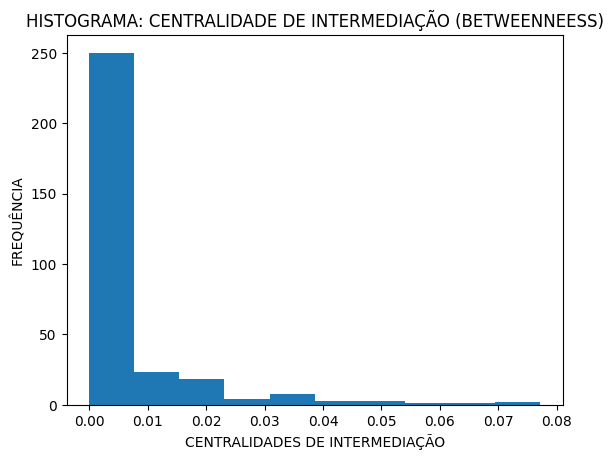

In [ ]:
dados = []
for chave, valor in cent_intermediacao.items():
    dados.append(valor)

plt.hist(dados, bins=10)
plt.xlabel("CENTRALIDADES DE INTERMEDIAÇÃO")
plt.ylabel("FREQUÊNCIA")
plt.title("HISTOGRAMA: CENTRALIDADE DE INTERMEDIAÇÃO (BETWEENNEESS)")
plt.show()

### Histograma para Autovetor (Eigenvector)

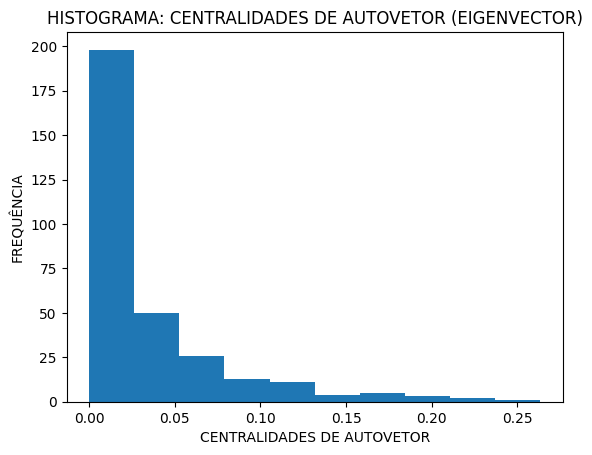

In [12]:
dados = []
for chave, valor in cent_autovetor.items():
    dados.append(valor)

plt.hist(dados, bins=10)
plt.xlabel("CENTRALIDADES DE AUTOVETOR")
plt.ylabel("FREQUÊNCIA")
plt.title("HISTOGRAMA: CENTRALIDADES DE AUTOVETOR (EIGENVECTOR)")
plt.show()

### Histograma para Centralidade de Grau de Saída (Out Degree)

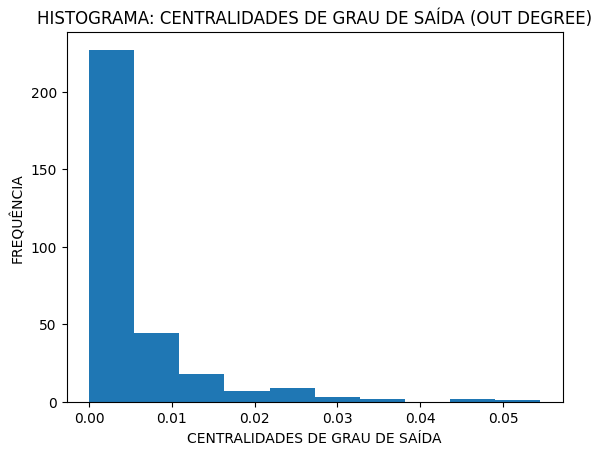

In [13]:
dados = []
for chave, valor in cent_out_dregree.items():
    dados.append(valor)

plt.hist(dados, bins=10)
plt.xlabel("CENTRALIDADES DE GRAU DE SAÍDA")
plt.ylabel("FREQUÊNCIA")
plt.title("HISTOGRAMA: CENTRALIDADES DE GRAU DE SAÍDA (OUT DEGREE)")
plt.show()

### Histograma para Centralidade do Grau de Entrada (In Degree)

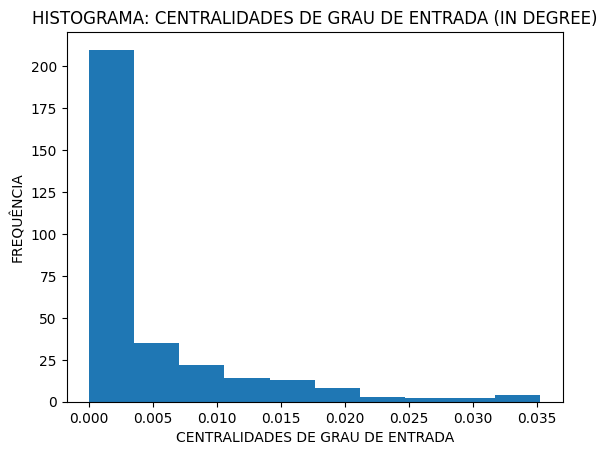

In [16]:
dados = []
for chave, valor in cent_in_dregree.items():
    dados.append(valor)

plt.hist(dados, bins=10)
plt.xlabel("CENTRALIDADES DE GRAU DE ENTRADA")
plt.ylabel("FREQUÊNCIA")
plt.title("HISTOGRAMA: CENTRALIDADES DE GRAU DE ENTRADA (IN DEGREE)")
plt.show()

### Histograma para Ranekamento de Páginas (Pagerank)

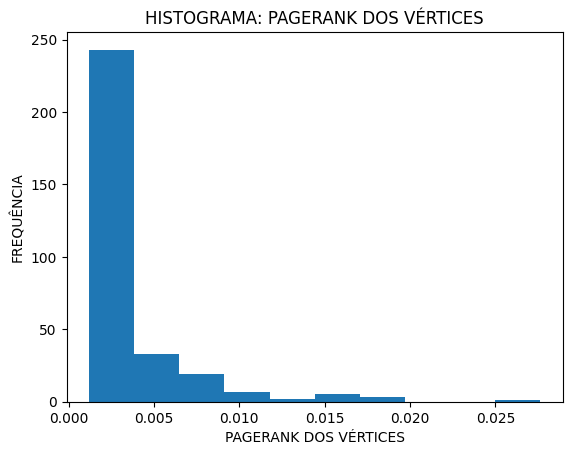

In [20]:
dados = []
for chave, valor in pagerank.items():
    dados.append(valor)

plt.hist(dados, bins=10)
plt.xlabel("PAGERANK DOS VÉRTICES")
plt.ylabel("FREQUÊNCIA")
plt.title("HISTOGRAMA: PAGERANK DOS VÉRTICES")
plt.show()

### Histograma para Comparar Repetições

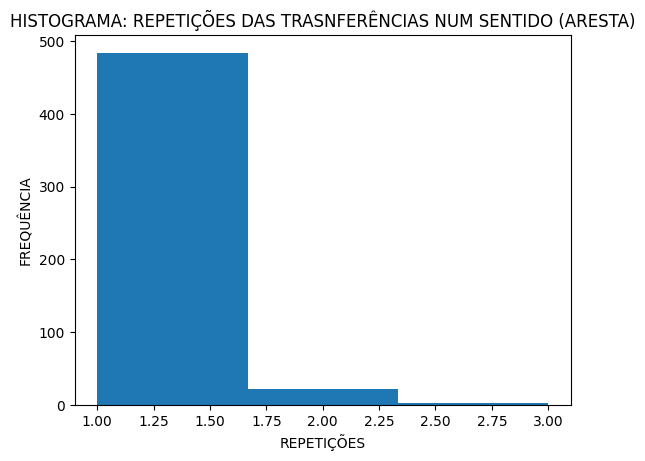

In [44]:
dados = []

for aresta in grafo.edges:
    dados.append(grafo[aresta[0]][aresta[1]]['quantidade_transferencias'])

plt.hist(dados, bins=3)
plt.xlabel("REPETIÇÕES")
plt.ylabel("FREQUÊNCIA")
plt.title("HISTOGRAMA: REPETIÇÕES DAS TRASNFERÊNCIAS NUM SENTIDO (ARESTA)")
plt.show()

## Distribuição das Métricas entre os Vértices

In [ ]:
### Tabelas para Grau de Saída

Quantidade de Times com grau de saída >= 5: 32
Porcentagem que esse grupo representa: 10.22%


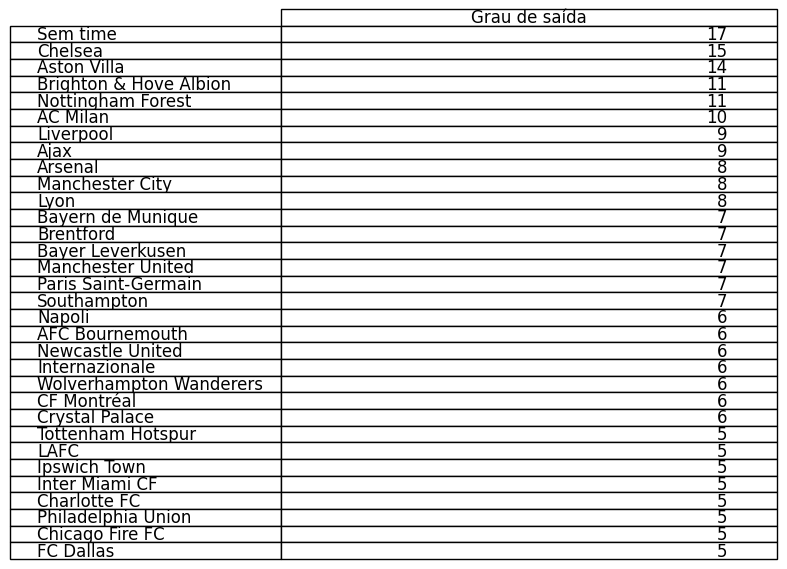

In [119]:
vertices_graus  = {}

labels_colunas  = ['Grau de saída']
valor_colunas   = []
valor_linhas    = []

minimo = int(input('Digite qual deve ser o valor mínimo para a tabela:'))

for vertice in grafo.nodes:
    if grafo.out_degree(vertice) >= minimo:
        vertices_graus[vertice] = grafo.out_degree(vertice)

vertices_graus = dict(sorted(vertices_graus.items(), key=lambda item: item[1], reverse=True ))
print(f'Quantidade de Times com grau de saída >= {minimo}: {len(vertices_graus.items())}')
print(f'Porcentagem que esse grupo representa: {(len(vertices_graus.items()) / 313) * 100:.2f}%')

for vertice, grau in vertices_graus.items():
    valor_linhas.append(vertice)
    valor_colunas.append([grau])

fig, ax = plt.subplots()
ax.axis('off')

table = ax.table(cellText=valor_colunas, colLabels=labels_colunas, rowLabels=valor_linhas, loc='center')
table.set_fontsize(12)

plt.show()


### Tabelas para Grau de Entrada

Quantidade de Times com grau de entrada >= 5: 32
Porcentagem que esse grupo representa: 10.22%


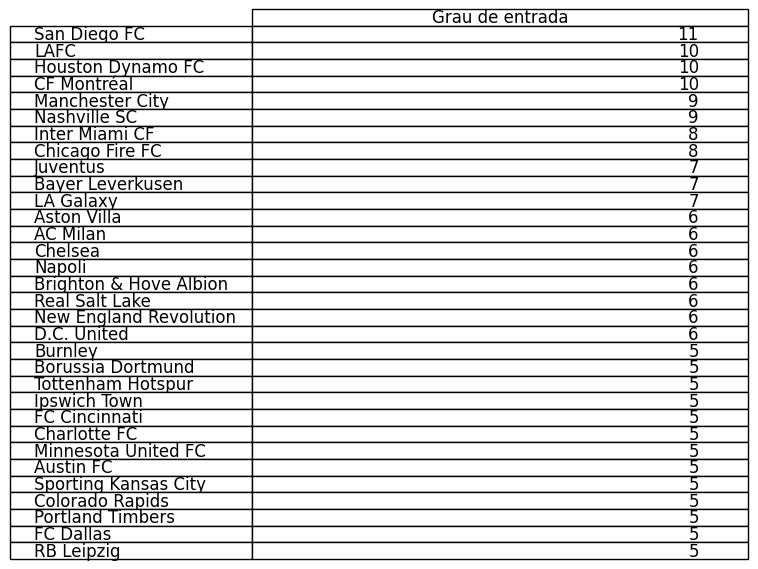

In [120]:
vertices_graus  = {}

labels_colunas  = ['Grau de entrada']
valor_colunas   = []
valor_linhas    = []

minimo = int(input('Digite qual deve ser o valor mínimo para a tabela:'))

for vertice in grafo.nodes:
    if grafo.in_degree(vertice) >= minimo:
        vertices_graus[vertice] = grafo.in_degree(vertice)

vertices_graus = dict(sorted(vertices_graus.items(), key=lambda item: item[1], reverse=True ))
print(f'Quantidade de Times com grau de entrada >= {minimo}: {len(vertices_graus.items())}')
print(f'Porcentagem que esse grupo representa: {(len(vertices_graus.items()) / 313) * 100:.2f}%')

for vertice, grau in vertices_graus.items():
    valor_linhas.append(vertice)
    valor_colunas.append([grau])

fig, ax = plt.subplots()
ax.axis('off')

table = ax.table(cellText=valor_colunas, colLabels=labels_colunas, rowLabels=valor_linhas, loc='center')
table.set_fontsize(12)

plt.show()

### Tabelas para Grau de Centralidade de Intermediação (Betweenness)

Quantidade de Times com Centralidade de Intermediação >= 0.01: 53
Porcentagem que esse grupo representa: 16.93%


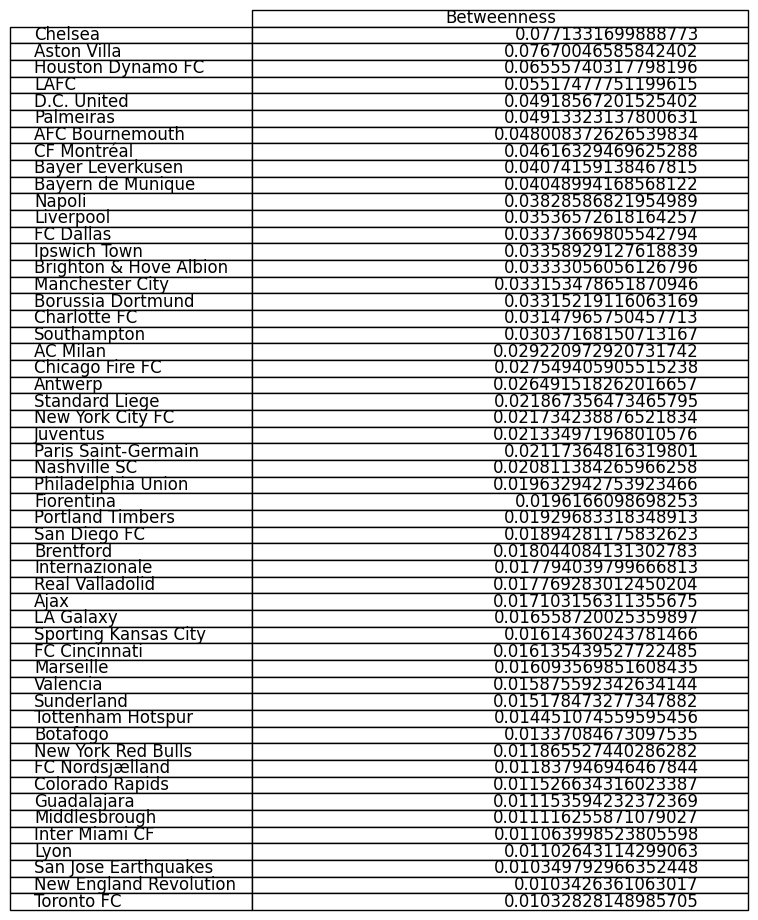

In [ ]:
vertices_centralidades  = nx.betweenness_centrality(grafo)
vertices_centralidades = dict(sorted(vertices_centralidades.items(), key=lambda item: item[1], reverse=True ))

labels_colunas  = ['Betweenness']
valor_colunas   = []
valor_linhas    = []

minimo = float(input('Digite qual deve ser o valor mínimo para a tabela:'))

for vertice, centralidade in vertices_centralidades.items():
    if centralidade >= minimo:
        valor_linhas.append(vertice)
        valor_colunas.append([centralidade])

print(f'Quantidade de Times com Centralidade de Intermediação >= {minimo}: {len(valor_linhas)}')
print(f'Porcentagem que esse grupo representa: {(len(valor_linhas) / 313) * 100:.2f}%')

fig, ax = plt.subplots()
ax.axis('off')

table = ax.table(cellText=valor_colunas, colLabels=labels_colunas, rowLabels=valor_linhas, loc='center')
table.set_fontsize(12)

plt.show()